<a href="https://colab.research.google.com/github/patcon/valency-anndata/blob/main/docs/notebooks/_documentation-examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples for Documentation Website

This notebook is for internal usage, and intended purely to help generate the images used in the documentation website.

On the built website, you can find this hidden page at:  
http://localhost:8000/valency-anndata/notebooks-autogenerated/_documentation-examples/

## Setup

In [ ]:
### To run on GOOGLE COLAB, uncomment this:

# %pip install --quiet \
#   git+https://github.com/patcon/polis-client \
#   git+https://github.com/polis-community/red-dwarf@algo-registries \
#   git+https://github.com/patcon/valency-anndata@main

In [1]:
import valency_anndata as val
from anndata import AnnData
import numpy as np

# 1. Define dimensions (cells x genes)
n_obs = 100
n_vars = 25

# 2. Create fake count data (dense numpy array)
X = np.random.poisson(1, size=(n_obs, n_vars)).astype(np.float32)

adata_empty = AnnData(X)

adata_mock = adata_empty.copy()
adata_mock.obs["user_annotation"] = None
adata_mock.obs["one_more"] = None
adata_mock.var["statement_annotation"] = None
adata_mock.var["another_one"] = None

/Users/patcon/repos/valenci-anndata/.venv/lib/python3.10/site-packages/pydantic/_internal/_generate_schema.py:2249: UnsupportedFieldAttributeWarning: The 'exclude' attribute with value True was provided to the `Field()` function, which has no effect in the context it was used. 'exclude' is field-specific metadata, and can only be attached to a model field using `Annotated` metadata or by assignment. This may have happened because an `Annotated` type alias using the `type` statement was used, or if the `Field()` function was attached to a single member of a union type.
  warnings.warn(


In [4]:

adata_polis_small = val.datasets.polis.load("https://pol.is/report/r2dfw8eambusb8buvecjt")
adata_polis_large = val.datasets.polis.load("https://pol.is/report/r29kkytnipymd3exbynkd", translate_to="en")

Data was gathered using the Polis software (see: https://compdemocracy.org/polis
and https://github.com/compdemocracy/polis) and is sub-licensed under CC BY 4.0
with Attribution to The Computational Democracy Project.
The data and more information about how the data was collected can be found at
the following link: https://pol.is/report/r2dfw8eambusb8buvecjt
Data was gathered using the Polis software (see: https://compdemocracy.org/polis
and https://github.com/compdemocracy/polis) and is sub-licensed under CC BY 4.0
with Attribution to The Computational Democracy Project.
The data and more information about how the data was collected can be found at
the following link: https://pol.is/report/r29kkytnipymd3exbynkd


## `val.viz.schematic_diagram`

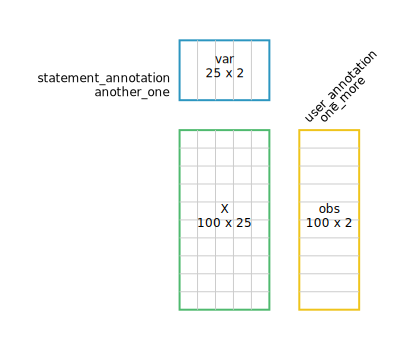

In [21]:
adata = adata_mock.copy()

val.viz.schematic_diagram(adata, filename="viz--schematic-diagrams-diff-simple.svg")

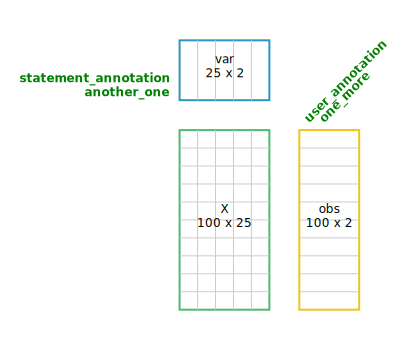

In [20]:
adata = adata_mock.copy()

val.viz.schematic_diagram(adata, diff_from=None, filename="viz--schematic-diagrams-diff-new.svg")

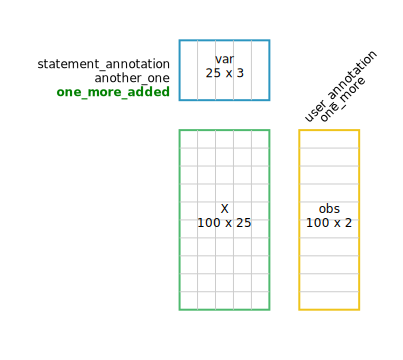

In [17]:
adata = adata_mock.copy()

adata_snap = adata.copy()
adata.var["one_more_added"] = None
val.viz.schematic_diagram(adata, diff_from=adata_snap, filename="viz--schematic-diagrams-diff-from.svg")

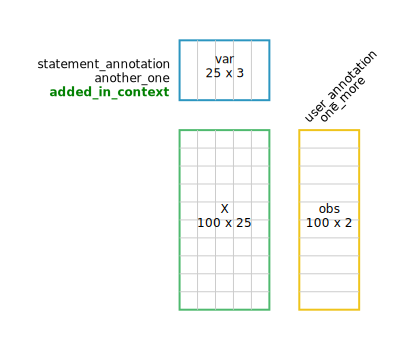

In [19]:
adata = adata_mock.copy()

with val.viz.schematic_diagram(diff_from=adata, filename="viz--schematic-diagrams-diff-context.svg"):
    adata.var["added_in_context"] = None

## `val.viz.langevitour`

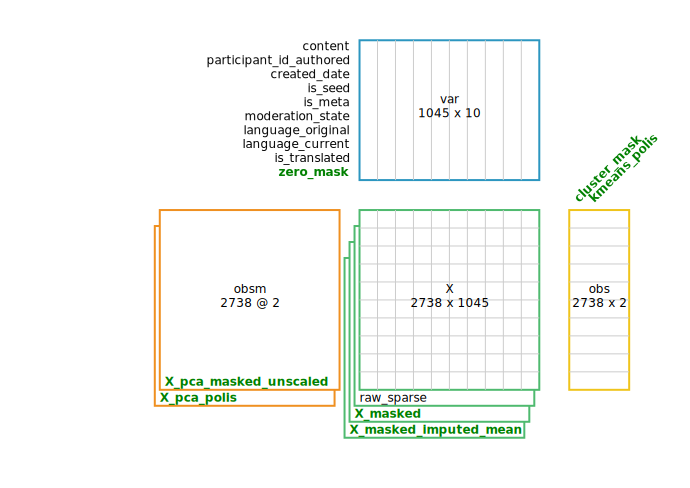

/Users/patcon/repos/valenci-anndata/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:210: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


In [ ]:
adata = adata_polis_large.copy()

with val.viz.schematic_diagram(diff_from=adata):
    val.tools.recipe_polis(adata)

val.preprocessing.neighbors(adata, use_rep="X_pca_polis")
val.tools.leiden(adata, flavor="igraph")
val.tools.umap(adata)

# Shorter key name for langevitour
adata.obsm["X_pca"] = adata.obsm["X_pca_polis"]

val.viz.langevitour(
    adata,
    use_reps=["X_umap", "X_pca[:10]"],
    color="leiden",
    initial_axes=["X_umap[0]", "X_umap[1]"],
)

## val.viz.voter_vignette_browser

In [5]:
adata = adata_polis_large.copy()

val.viz.voter_vignette_browser(adata)